<a href="https://colab.research.google.com/github/ameschini2206/DSII-Primera_Entrega_Alejandro_Meschini/blob/main/Primera_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyecto DATA SCIENCE II - ALEJANDRO MESCHINI
## Primera Entrega  
### Archivo: Primera_Entrega.ipynb

---

# REQUISITOS PRIMERA ENTREGA

1. Resumen

Este trabajo consiste en un análisis exploratorio y preprocesamiento de un conjunto de datos sobre ventas de autoelevadores en Argentina. El objetivo principal es preparar los datos para un futuro modelo de regresión que prediga el Precio_USD de los autoelevadores. Se identificaron desafíos iniciales como valores faltantes en columnas clave y la necesidad de estandarizar variables técnicas.


2. Objetivo

Determinar qué variables (capacidad, altura, estado, horas de uso, métodos de pagos) tienen mayor impacto en el precio de venta de los equipos para desarrollar un modelo que prediga con precisión el valor futuro de los autoelevadores en el mercado local.


3. Contexto Comercial

Trabajo para una empresa llamada "AV3 Arg", dedicada a la compra y venta de maquinaria industrial. Necesitamos optimizar la política de precios, ya que actualmente se fijan de forma manual y subjetiva. Necesitamos una herramienta basada en datos que nos permita cotizar equipos de forma competitiva y rentable ya que el contexto actual es muy competitivo.

4. Hipótesis

4.1 Hipótesis de Regresión: Utilizando datos históricos como capacidad de carga y horas de uso, se puede desarrollar un modelo que prediga con precisión el Precio_USD de un equipo.

4.2 Hipótesis de Correlación: Existe una correlación negativa significativa entre las Horas_uso y el Precio_USD, sugiriendo que a mayor uso, el precio disminuye drásticamente.

---

# Variables y definición

- ID_venta: Es un código único para cada transacción.

- Fecha_venta: Indica cuándo se realizó la operación. Es crucial para analizar la estacionalidad (¿se vende más en verano?) o la inflación de los precios a lo largo del tiempo.

- Marca: El fabricante del equipo (Toyota, Linde, Hyster, etc.). El valor de reventa suele variar mucho según la marca.

- Tipo:lEs el sistema de propulsión: Eléctrico, Diésel o Gas (GLP). Los eléctricos suelen tener un precio inicial más alto pero menores costos de mantenimiento.

- Capacidad_kg: La carga máxima que el equipo puede levantar (1800, 2500, 3500, 5000 kg). Suele ser una de las variables con mayor peso en el precio.

- Altura_torre_mm: La elevación máxima de las uñas en milímetros. Una mayor altura implica una torre más compleja y costosa. Generalmente a mayor altura de torre mayor valor.

- Año_fabricación: El año en que se fabricó la unidad. Determina la obsolescencia tecnológica del equipo.

- Horas_uso: El "kilometraje" del autoelevador. Es fundamental para determinar el desgaste.

- Provincia: Ubicación geográfica de la venta en Argentina. Útil para ver si los precios varían por región (ej. mayores precios en zonas mineras o portuarias).

- Cliente_tipo: Si el comprador es una "empresa logística", "particular" o "distribuidor".

- Estado: Condición del equipo (Nuevo, Reacondicionado, Usado). Esta variable es un predictor crítico del precio.

- Método_pago: Es la forma en que se paga el equipo. Contado, crédito o leasing.

- Vendedor: Nombre de la concesionaria o entidad que realizó la venta.

Precio_USD: Es el valor final de venta en dólares estadounidenses.

---

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/DSII-Primera_Entrega_Alejandro_Meschini/refs/heads/main/Venta%20de%20autoelevadores%20AV3.csv'
df = pd.read_csv(url_proyecto)
df.head()

,ID_venta,Fecha_venta,Marca,Tipo,Capacidad_kg,Altura_torre_mm,Provincia,Cliente_tipo,Año_fabricación,Estado,Método_pago,Vendedor,Horas_uso,Precio_USD
0,VENT00822,2022-01-07,Linde,eléctrico,5000,3000,Santa Fe,particular,2019.0,usado,contado,Grupo Industrial SA,2939.574817,49656.58
1,VENT00209,2022-01-08,Hyster,gas,1800,3000,Santa Fe,particular,2015.0,reacondicionado,contado,Potencia SRL,5014.133313,19701.25
2,VENT00073,2022-01-09,Yale,eléctrico,3500,4700,Buenos Aires,empresa logística,2017.0,nuevo,contado,Grupo Industrial SA,2754.485177,54889.31
3,VENT01169,2022-01-10,Linde,eléctrico,1800,4000,Santa Fe,distribuidor,2019.0,usado,contado,Forklift Solutions,6395.600622,12000.00
4,VENT00129,2022-01-11,Hyster,eléctrico,1800,4000,Buenos Aires,NaN,2023.0,usado,leasing,Forklift Solutions,1564.786242,18145.26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_venta         1250 non-null   object 
 1   Fecha_venta      1250 non-null   object 
 2   Marca            1250 non-null   object 
 3   Tipo             1250 non-null   object 
 4   Capacidad_kg     1250 non-null   int64  
 5   Altura_torre_mm  1250 non-null   int64  
 6   Provincia        1163 non-null   object 
 7   Cliente_tipo     1153 non-null   object 
 8   Año_fabricación  1148 non-null   float64
 9   Estado           1250 non-null   object 
 10  Método_pago      1146 non-null   object 
 11  Vendedor         1250 non-null   object 
 12  Horas_uso        1163 non-null   float64
 13  Precio_USD       1250 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 136.8+ KB


In [4]:
df.shape

(1250, 14)

In [7]:
df.columns

Index(['ID_venta', 'Fecha_venta', 'Marca', 'Tipo', 'Capacidad_kg',
       'Altura_torre_mm', 'Provincia', 'Cliente_tipo', 'Año_fabricación',
       'Estado', 'Método_pago', 'Vendedor', 'Horas_uso', 'Precio_USD'],
      dtype='object')

Estas son las variables que tenemos. La variable objetivo es el Precio_USD de las máquinas e iremos viendo con el correr del trabajo cuales del resto presentan correlación con esta.

In [5]:
df['Horas_uso'] = df['Horas_uso'].round(0).astype('Int64')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Capacidad_kg,1250.0,2925.84,1038.727808,1800.0,1800.0,2500.0,3500.0,5000.0
Altura_torre_mm,1250.0,4148.32,995.740115,3000.0,3000.0,4000.0,4700.0,6000.0
Año_fabricación,1148.0,2020.077526,3.105259,2015.0,2017.0,2020.0,2023.0,2025.0
Horas_uso,1163.0,3607.365434,1816.744389,123.0,2224.5,3537.0,4859.5,10017.0
Precio_USD,1250.0,33092.021624,12942.458489,12000.0,23252.0625,31753.585,42068.71,71274.16


Vamos a empezar a analizar los datos para hacernos una idea de algunas variables

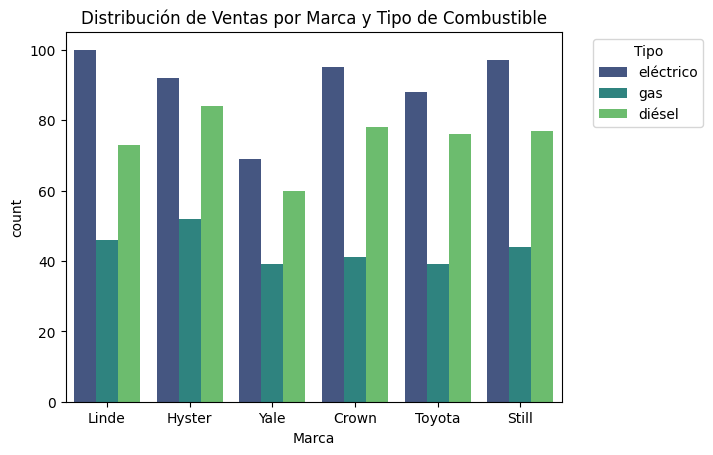

In [24]:
sns.countplot(x='Marca', data=df, hue='Tipo', palette='viridis')
plt.title('Distribución de Ventas por Marca y Tipo de Combustible')
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-315/1952348209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marca', data=df, palette='viridis')


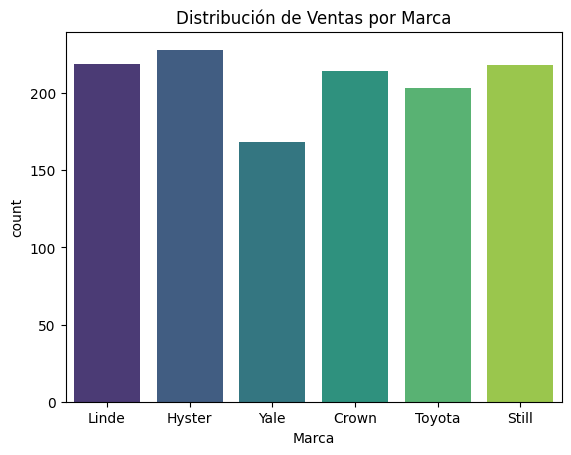

In [26]:
sns.countplot(x='Marca', data=df, palette='viridis')
plt.title('Distribución de Ventas por Marca')
plt.show()

A través de los siguientes gráficos podemos apreciar que el equipo mas vendido es de la marca HYSTER y los equipos electricos son los mas demandados

In [27]:
ventas_por_marca = df.groupby('Marca').agg(
    Cantidad_Ventas=('ID_venta', 'count'),
    Total_Facturado_USD=('Precio_USD', 'sum'),
    Precio_Promedio=('Precio_USD', 'mean')
).sort_values(by='Cantidad_Ventas', ascending=False).reset_index()

total_ventas = ventas_por_marca['Cantidad_Ventas'].sum()
ventas_por_marca['Market_Share_%'] = (ventas_por_marca['Cantidad_Ventas'] / total_ventas) * 100

print(ventas_por_marca)

    Marca  Cantidad_Ventas  Total_Facturado_USD  Precio_Promedio  \
0  Hyster              228           7465450.14     32743.202368   
1   Linde              219           7359704.02     33605.954429   
2   Still              218           7095630.85     32548.765367   
3   Crown              214           7016375.12     32786.799626   
4  Toyota              203           6720901.71     33107.890197   
5    Yale              168           5706965.19     33970.030893   

   Market_Share_%  
0           18.24  
1           17.52  
2           17.44  
3           17.12  
4           16.24  
5           13.44  


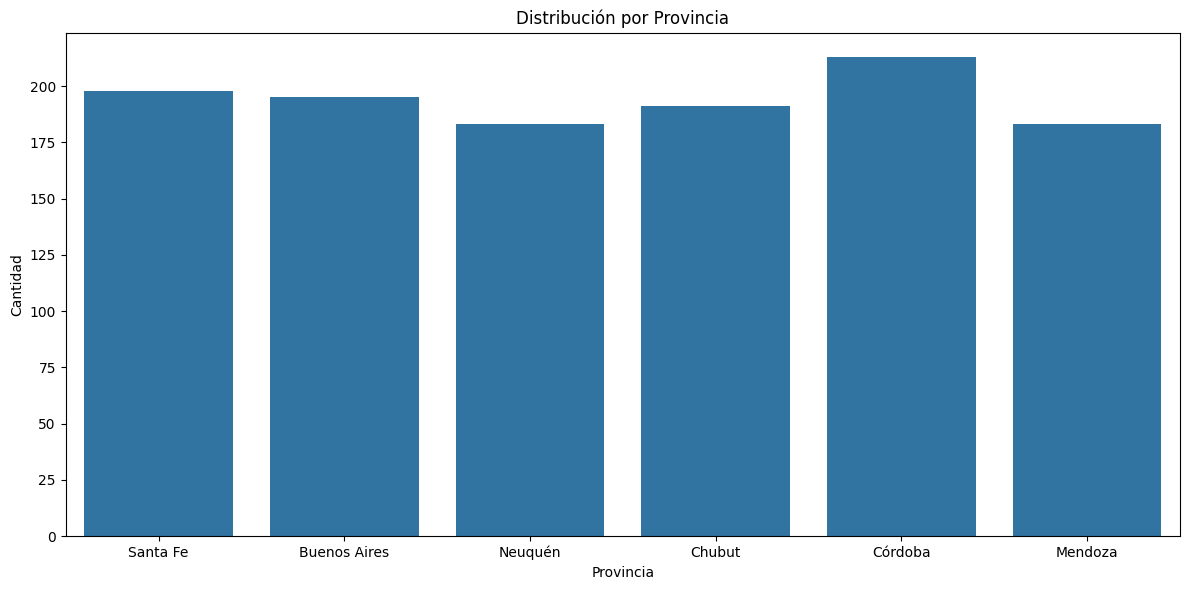

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Provincia', data=df)
plt.title("Distribución por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

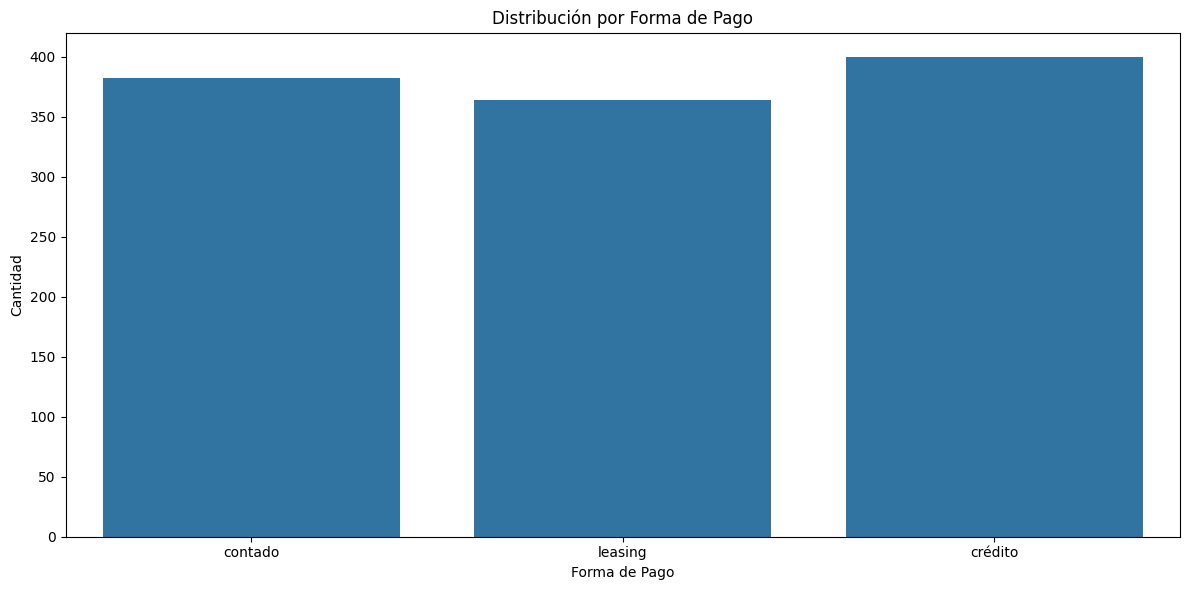

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='Método_pago', data=df)
plt.title("Distribución por Forma de Pago")
plt.xlabel("Forma de Pago")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [8]:
df.isnull().sum()

,0
ID_venta,0
Fecha_venta,0
Marca,0
Tipo,0
Capacidad_kg,0
Altura_torre_mm,0
Provincia,87
Cliente_tipo,97
Año_fabricación,102
Estado,0


Vemos que hay varios valores faltantes en varias columnas. Vamos a empezar a trabajarlos para analizar acciones